In [ ]:
install.packages("googledrive")
library("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# authorize google drive
drive_auth(
  email = gargle::gargle_oauth_email(),
  path = NULL,
  scopes = "https://www.googleapis.com/auth/drive",
  cache = gargle::gargle_oauth_cache(),
  use_oob = gargle::gargle_oob_default(),
  token = NULL
)

Warning message:
“It is very unusual to provide both `email` and `path` to `drive_auth()`.
They relate to two different auth methods.
The `path` argument is only for a service account token.
If you need to specify your own OAuth client, use `drive_auth_configure()`.”
No encoding supplied: defaulting to UTF-8.

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=9c85dd330a797799a732d76ebd17ce5e&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWJVUjJWTmJDVXpuSlN0YmRPUjdCLThlNkVYdVU0ZS11Q3FLUEIzYlh6YXcwSk5iUWI5eEt3bnhqZHhWOVhvUW03SGVyZyIsInN0YXRlIjoiOWM4NWRkMzMwYTc5Nzc5OWE3MzJkNzZlYmQxN2NlNWUifQ==


In [ ]:
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

In [ ]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")
if (!require("clevr")) install.packages("clevr")
library ("clevr")

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: clevr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘clevr’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘BH’




In [ ]:
file_id <- "1zZoG85aLBIXUw3BJSMZdN2OfkstxgPsF"
file <- drive_download(as_id(file_id))

In [ ]:
unzip("finance_data.zip")

QUESTION 1:

The upper and lower bounds on ρij can be determined based on the properties of correlation coefficients.

Correlation coefficients range between -1 and +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation. Therefore, the bounds on ρij are -1 ≤ ρij ≤ +1.

Now, let's discuss why log-normalized return (ri(t)) is used instead of regular return (qi(t)).

Using log-normalized return has several advantages over regular return:

  Symmetry: Log-normalized returns have the property of symmetry, meaning that the positive and negative returns have the same magnitude but opposite signs. This symmetry simplifies the analysis and allows for easier interpretation of the correlation between stock returns.

  Linearization: Taking the logarithm of 1 plus the regular return linearizes the return series. This linearization is useful for various statistical analyses, including correlation calculations, as it allows for the application of techniques that assume linearity.

  Stability: Log-normalized returns tend to stabilize the variance of the return series. Regular returns often exhibit heteroscedasticity, meaning that the variance changes over time. By taking the logarithm, we reduce the impact of extreme values and make the return series more stable.

  Normality assumption: Many financial models and statistical techniques assume that the data follow a normal distribution. While stock returns are not normally distributed, the log-normalized returns approximate a normal distribution better than regular returns. This approximation facilitates the application of various statistical tests and models.

Overall, using log-normalized return (ri(t)) instead of regular return (qi(t)) provides statistical benefits, simplifies analysis, and aligns with assumptions of many financial models.

In [ ]:
path = "finance_data/data/"
out.file<-""
file.names <- dir(path, pattern =".csv")
m <- matrix(, nrow = 0, ncol = 765)
sectors.table <- read.table("finance_data/Name_sector.csv",header=TRUE, sep=",", stringsAsFactors=TRUE)
sectors = c()
sectors.names <- c()
for(i in 1:length(file.names)){
    file <- read.table(paste("finance_data/data/",file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
    if(length(file$Close)==765){
        m <- rbind(m, matrix(file$Close, nrow=1, ncol=765))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector <- sectors.table$Sector[which(sectors.table$Symbol == mystr)]
#         print(sector)
#        sectors = c(sectors, as.factor(sector))
        sectors.names = c(sectors.names, toString(sector))
    }
}
com_num = length(sectors.names)
data_num = ncol(m)
sector.set<-as.factor(sectors.names)
sectors.index<-as.numeric(sector.set)
num_sector <- length(unique(sectors.index))
table(sector.set)

sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         36 
                    Energy                 Financials 
                        34                         63 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

In [ ]:
#correlation 
cal_cor<-function(comp_date){
  # cor_mat <- cor(comp_date)
  # Compute the differences between consecutive elements
  # diff_result <- diff(comp_date)
  diff_result <- matrix(0, nrow(comp_date), ncol(comp_date))

  # Loop through the columns
  for (i in 2:ncol(comp_date)) {
    diff_result[, i] <- comp_date[, i] - comp_date[, i - 1]
  }

  # Compute the log-normalized returns
  qi <- diff_result[,c(2:765)] / comp_date[,c(1:764)]
  ri <- log(1 + qi)
  # # Compute the mean of log-normalized returns
  mean_ri <- rowMeans(ri, na.rm = TRUE)

  # Compute the correlation matrix using the provided equation
  n <- nrow(ri)
  cor_mat <- matrix(0, ncol = ncol(ri), nrow = ncol(ri))
  for (i in 1:(nrow(ri) - 1)) {
    for (j in (i):(nrow(ri))) {
      numerator <- mean(ri[i,]*ri[j,]) - mean_ri[i]*mean_ri[j]
      denominator <- sqrt((mean(ri[i,]^2) - mean_ri[i]^2)*(mean(ri[j,]^2) - mean_ri[j]^2))
      cor_mat[i, j] <- numerator / denominator
      cor_mat[j, i] <- cor_mat[i, j]
    }
  }

  # Return the correlation matrix
  return(cor_mat)
}

In [ ]:
print(dim(m))
temp <- cal_cor(m)
d <- sqrt(2 * (1 - temp))
g<-graph_from_adjacency_matrix(d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)
fname <- matrix(d)
save(fname, file = "distance.RData")

[1] 494 765


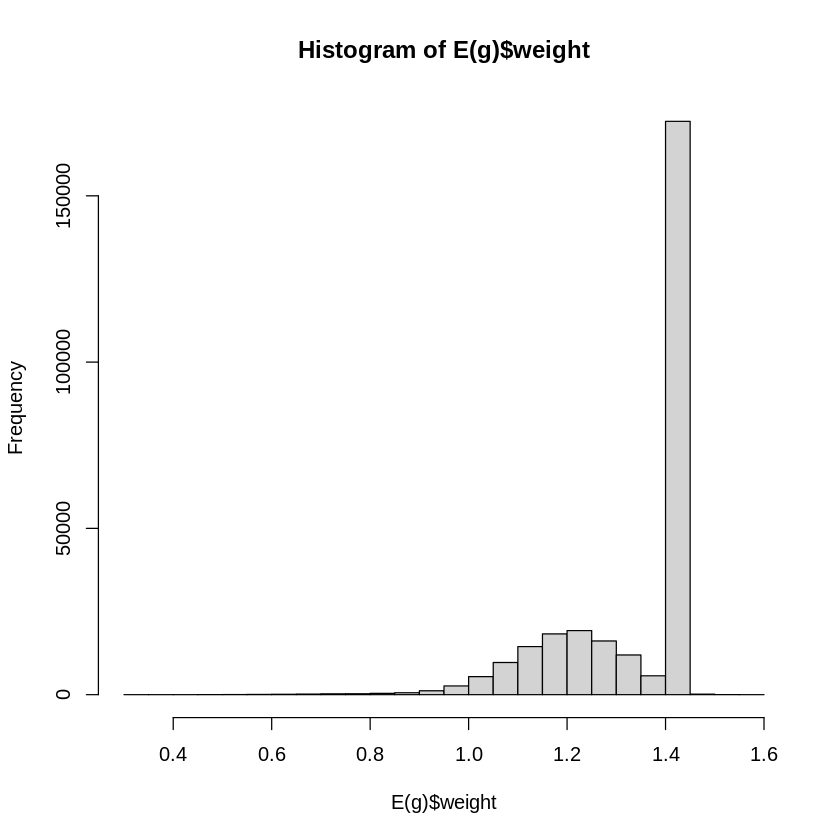

In [ ]:
hist(E(g)$weight)

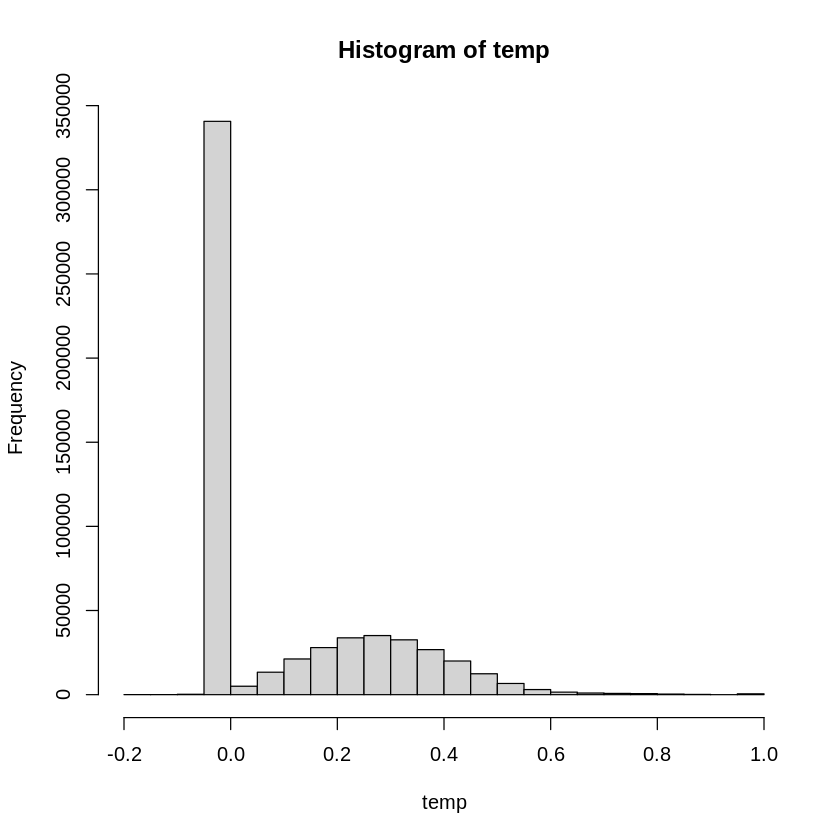

In [ ]:
hist(temp)

png 
  2

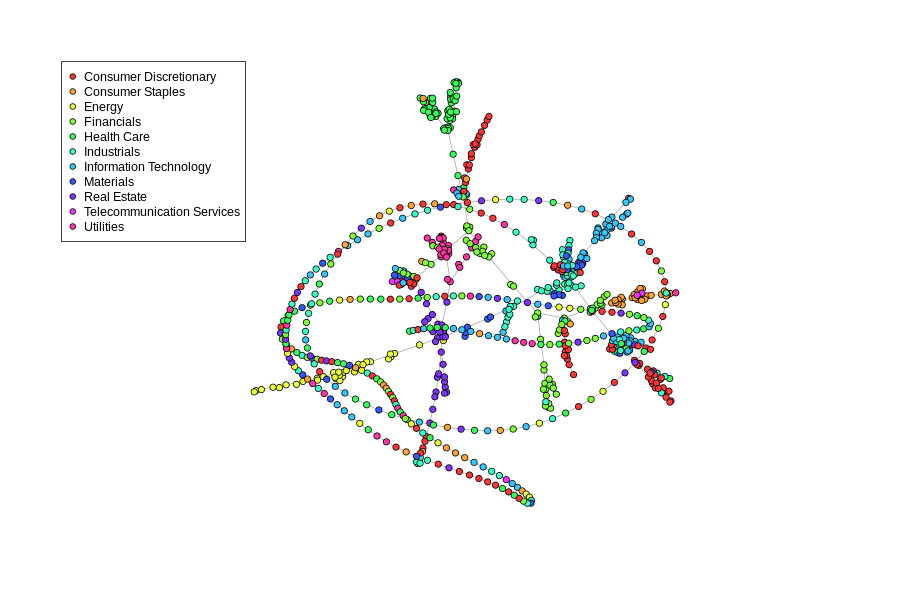

In [ ]:
# mst_g <- mst(g)
mst_g <- minimum.spanning.tree(g)
colbar <- rainbow(num_sector,s = 0.8, v = 1)

# Set the width and height of the plotting device
png("plot.png", width = 12, height = 8, units = "in", res = 75)
plot(mst_g, vertex.size = 3, vertex.label = NA, vertex.color = colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)
dev.off()
library(IRdisplay)
display_png(file = "plot.png")

[1] 63

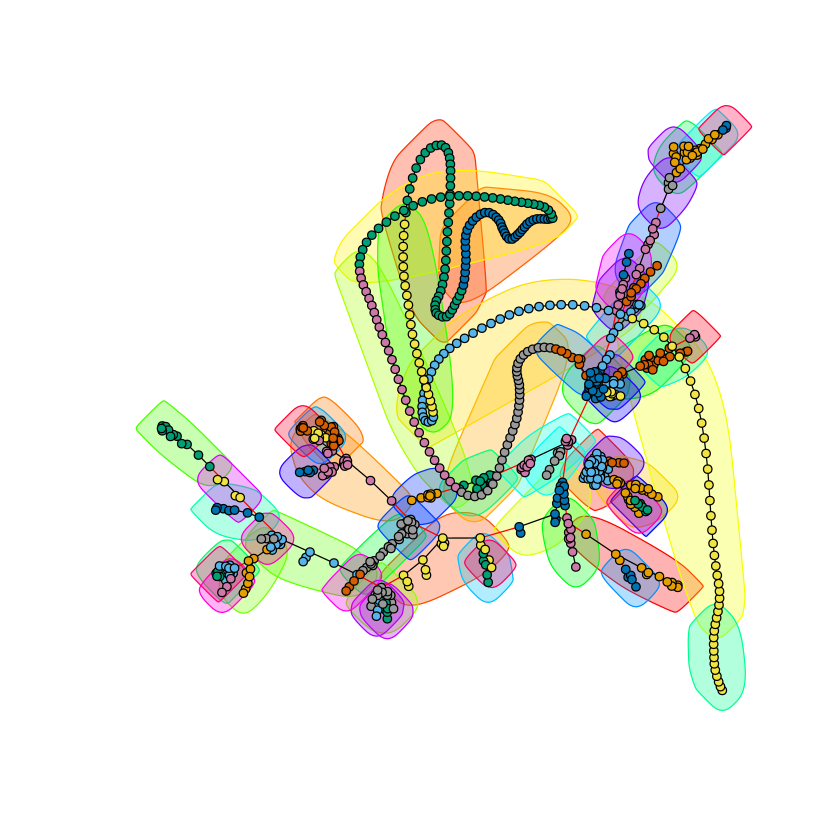

In [ ]:
#cluster
wc_daily <- walktrap.community(mst_g)
length(wc_daily)
plot(wc_daily, mst_g, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)

In [ ]:
#get metrics
print(sectors.index)
print(wc_daily$membership)
true<- c(t(sectors.index))
pred <- c(wc_daily$membership)
print(length(true))
print(length(pred))
homogeneity(true, pred)
completeness(true,pred)

  [1]  5  6  1  7  5  5  5  7  7  7  2  7  7  7 11 11 11  5  4  5  4  9  4  4  7
 [26]  8  6  4  6  5  7  7  6  4  5  4  9  1  1  5  4  3  3  8  7  9  6  7  9  7
 [51]  8 11  4  6  1  6  4  5  1  4  1  5  5  4  2  3  5  4  4  8  5  4  5  1  9
 [76]  4  7  2  5  6  4  9  4  1  9  1  5  5  8  2  3  6  1  5  4  2  2  4  1  4
[101]  1  6 11  5 11  4  3  1  6  5  3  2  2  2  7  7  6  6 10  7  7  2  3  3 11
[126]  6  8  6  4  1  5  1  5  1  1  1  1  1  9  1  6  8  2  1 11 11  5  3  7  7
[151]  7  8 11  6 11  2  8  6  3  9  9  3 11  5  9  4  6 11  5  5 11  6  1  9  1
[176]  6  7  6  8  6 11  7  7  7  4  1  7  6  6  8  1  1  9  3  6  6  9  5  2  7
[201]  1  7  7  1  7  1  1  4  1  6  3  1  4  1  5  9  9  1  3  4  1  5  6  3  7
[226]  4  2  7  5  9  2  5  7  4  5  8  5  5  7  7  8  1  6  9  5  7  6  4  6  6
[251]  6  5  7  4  1  2  4  9  7  2  3  1  2  1  2  1  6  4  1  1  1  5  1  6  5
[276]  6  4 11  1  7  4  6 10  8  1  7  9  9  1  6  1  1  7  5  4  2  5  4  1  2
[301]  2  8  4  6  5  2  2  

ERROR: ignored